In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/Student Depression Dataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
#shows all the columns without limiting when displayed
pd.set_option('display.max_columns', None)

In [4]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Here i have used a for loop to read all the columns in the datafarame 'data', but still it will ignore the columns in the ignore_cols list as they have unique values for most of the instances it is of no use to get the unique values of these columns. For other columns this code will display all the uniques values. 

In [5]:
for column in data.columns:
    ignore_cols=['id','Age','CGPA']
    if column not in ignore_cols:
        print(column,data[column].unique())
        print('-'*20)

Gender ['Male' 'Female']
--------------------
City ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
--------------------
Profession ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
--------------------
Academic Pressure [5. 2. 3. 4. 1. 0.]
--------------------
Work Pressure [0. 5. 2.]
--------------------
Study Satisfaction [2. 5. 3. 4. 1. 0.]
--------------------
Job Satisfaction [0. 3. 

When refering the uniques values the Financial Stress column

In [6]:
data['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [7]:
ignore_rows = ['City','Harsha','Saanvi','Less than 5 Kalyan','3.0','ME','Mira','Bhavna','Less Delhi','M.Tech','Vaanya','Gaurav','Harsh','Reyansh','Kibara','Rashi','M.com','Nalyan','Mihir','Nalini','Nandini','Khaziabad','M.Com']
row_index = data.index[data['City'].isin(ignore_rows)].tolist()
print(row_index)
data = data.drop(row_index)

[4445, 5697, 5748, 6010, 6830, 7021, 7355, 7715, 8730, 12618, 12847, 13545, 13899, 14057, 14561, 17125, 18377, 21524, 22682, 22961, 24008, 24552, 24744, 25133, 25154, 26317]


In [8]:
data['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [9]:
from matplotlib import pyplot as plt
import seaborn as sea

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


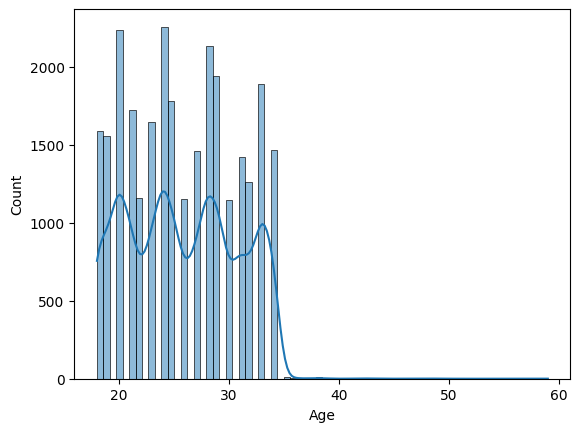

In [10]:
# plt.hist(data['Financial Stress'])
sea.histplot(data["Age"], kde=True)
plt.show()

In [11]:
data['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

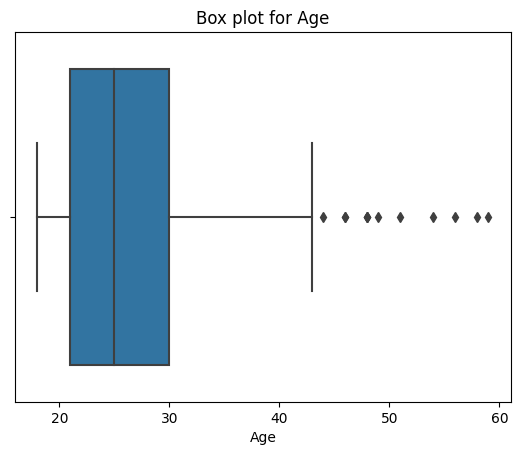

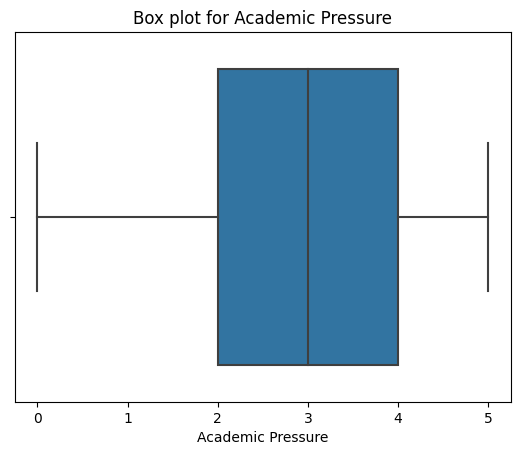

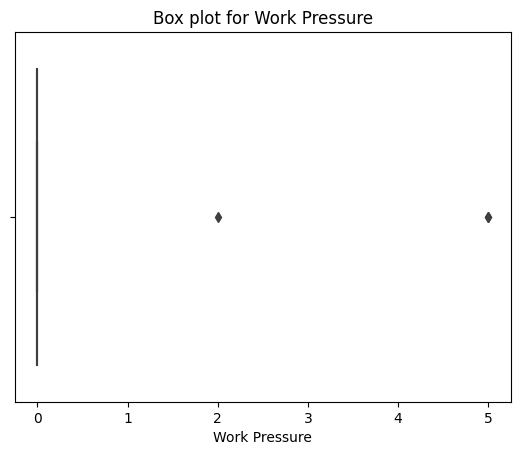

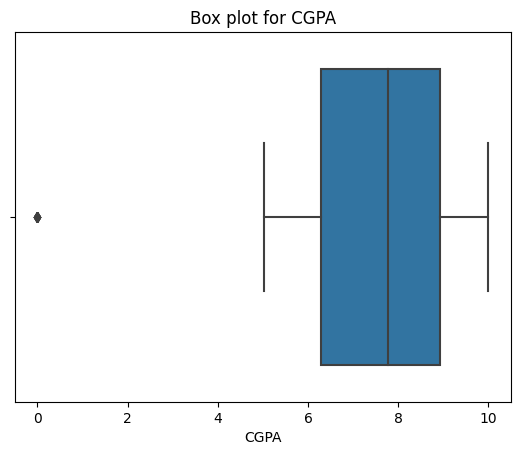

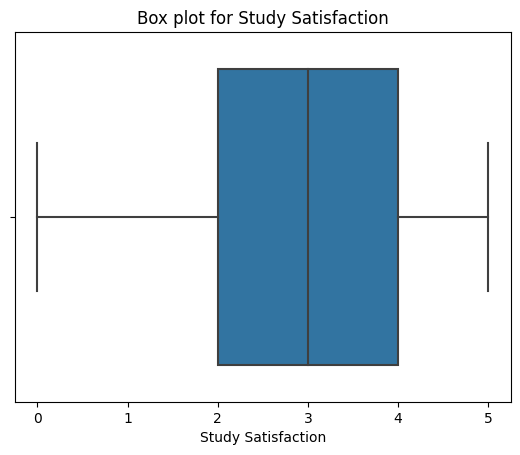

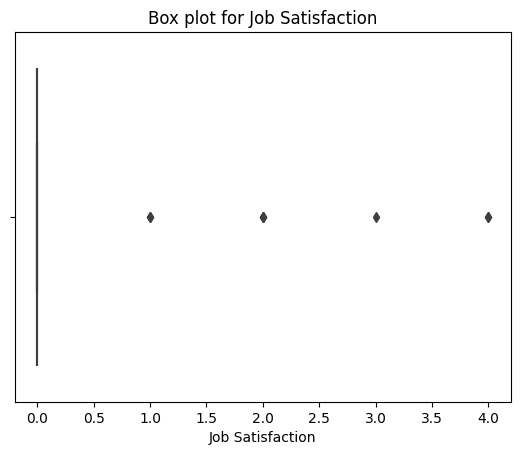

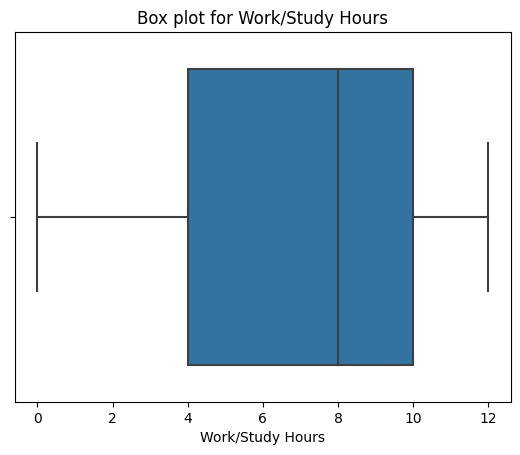

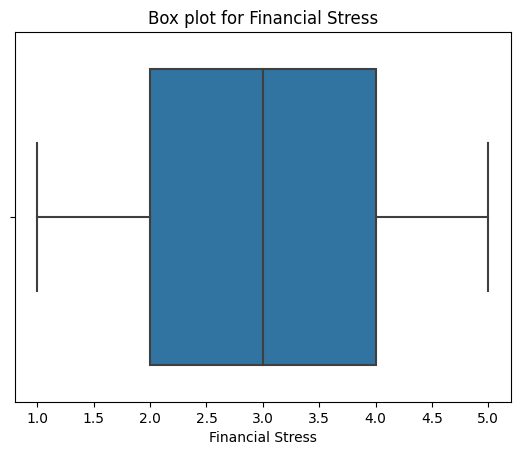

In [12]:
boxplot_columns = ['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress']
for column in boxplot_columns:
    sea.boxplot(x=data[column])
    plt.xlabel(f"{column}")
    plt.title(f"Box plot for {column}")
    plt.show()

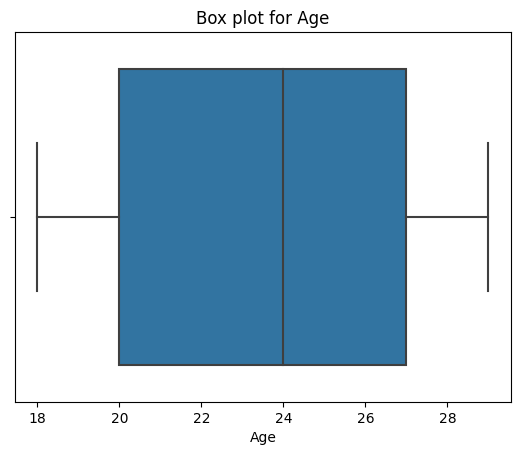

In [13]:
data = data[data['Age'] < 30]
sea.boxplot(x=data['Age'])
plt.xlabel("Age")
plt.title("Box plot for Age")
plt.show()

In [14]:
object_columns = data.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder



for column in object_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    

In [16]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,8,0,24.0,2,10,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
3,30,0,28.0,27,10,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,10,10,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,33,1,29.0,21,10,2.0,0.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
8,59,1,28.0,18,10,3.0,0.0,9.79,1.0,0.0,1,1,2,1,12.0,3.0,0,1


In [17]:
data = data.drop(['id','Work Pressure','Profession'],axis = 1)
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,0,24.0,2,2.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
3,0,28.0,27,3.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,10,4.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,1,29.0,21,2.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
8,1,28.0,18,3.0,9.79,1.0,0.0,1,1,2,1,12.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,1,23.0,23,3.0,6.00,2.0,0.0,3,0,20,1,12.0,4.0,0,0
27896,0,27.0,24,5.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1,0
27897,1,27.0,15,2.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1,0
27899,0,18.0,15,5.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0,1


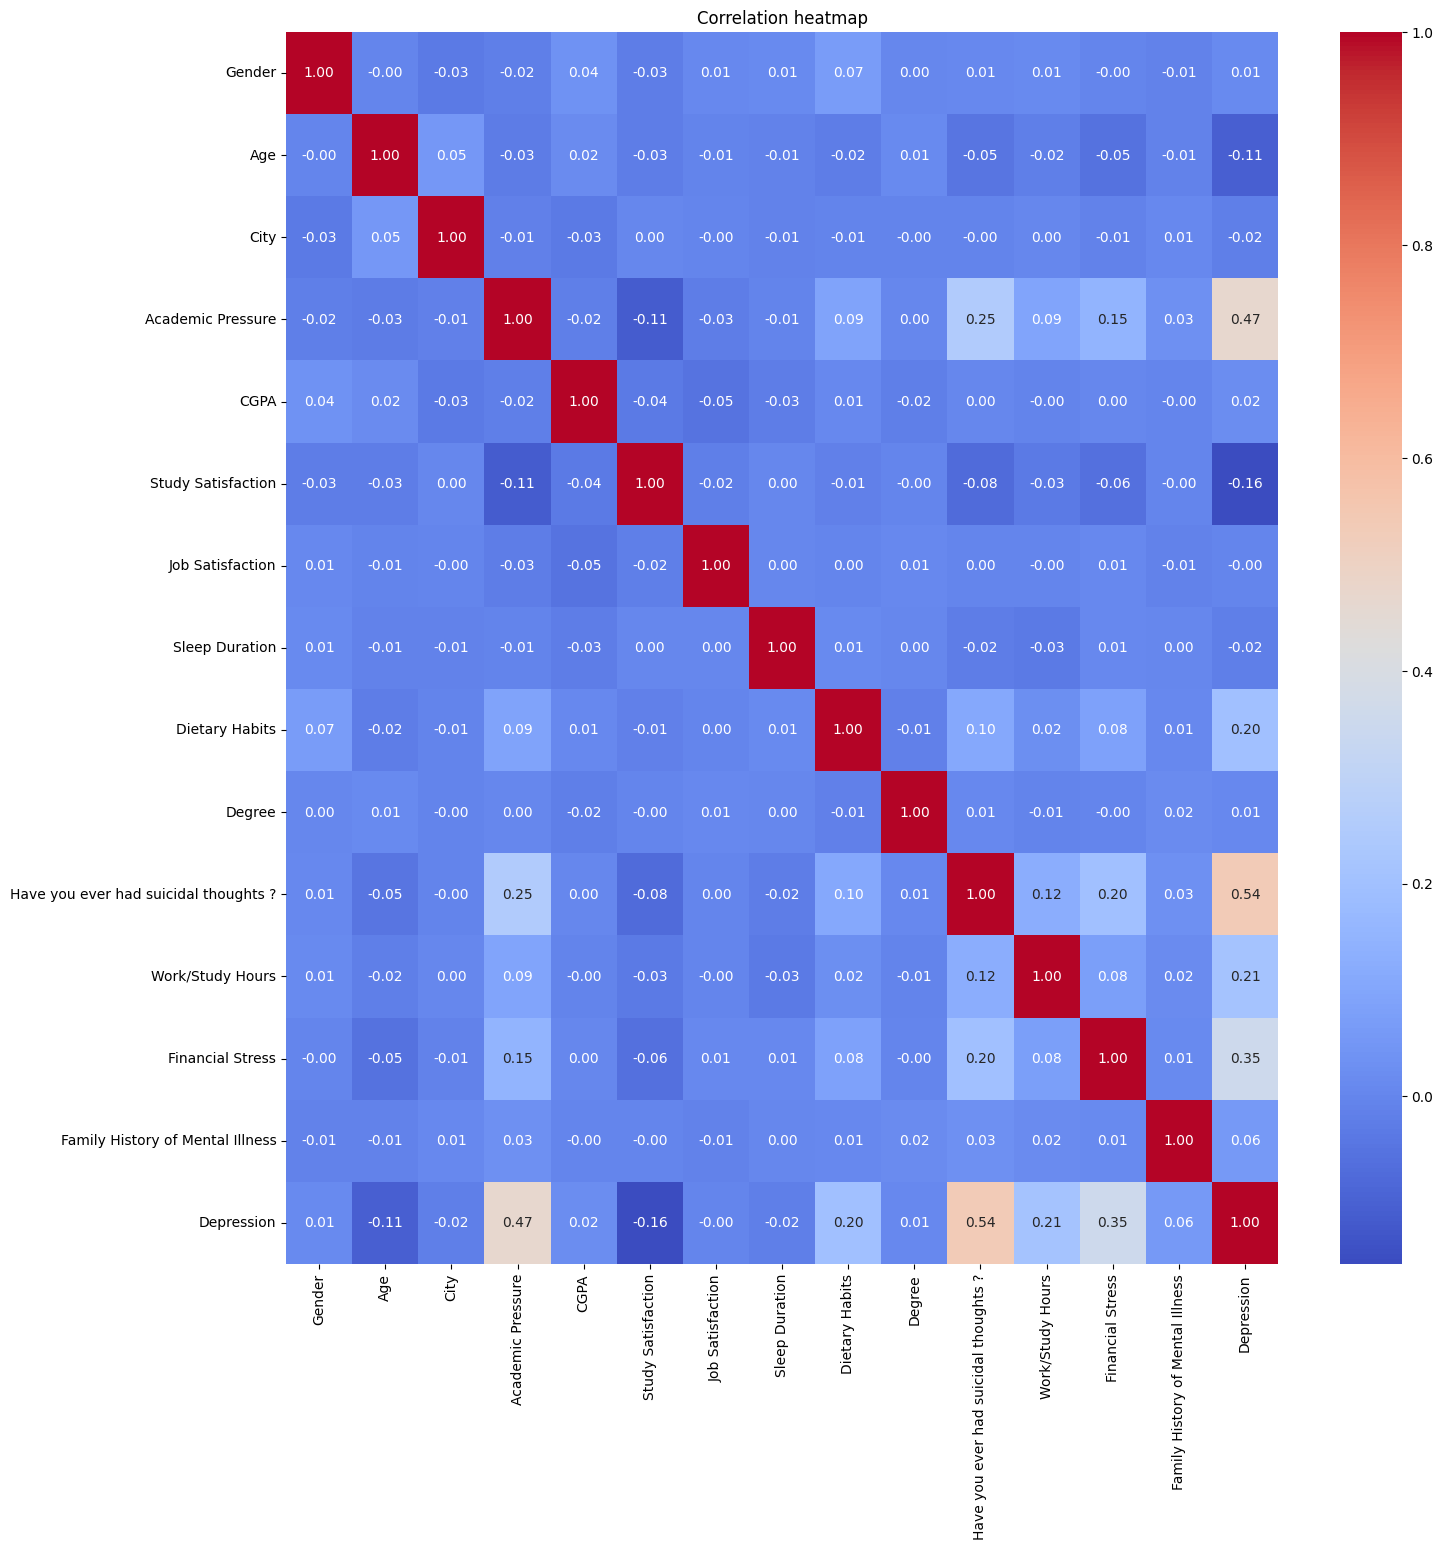

In [18]:
plt.figure(figsize=(16, 16))
sea.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [19]:
FS_mode = data['Financial Stress'].mode()
FS_mode = round(FS_mode,0)
print(FS_mode)
data['Financial Stress'].fillna(3.0, inplace=True) 

0    5.0
Name: Financial Stress, dtype: float64


/tmp/ipykernel_18/2825095146.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(3.0, inplace=True)


In [20]:
data.iloc[4459]

Gender                                    0.00
Age                                      27.00
City                                      2.00
Academic Pressure                         4.00
CGPA                                      9.91
Study Satisfaction                        4.00
Job Satisfaction                          0.00
Sleep Duration                            0.00
Dietary Habits                            0.00
Degree                                   25.00
Have you ever had suicidal thoughts ?     1.00
Work/Study Hours                         12.00
Financial Stress                          5.00
Family History of Mental Illness          1.00
Depression                                1.00
Name: 6012, dtype: float64

In [21]:
data.isnull().sum().sum()

0

In [22]:
X = data.drop(columns=["Depression","Job Satisfaction"])
y = data["Depression"]

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16508, 13)
(16508,)
(4128, 13)
(4128,)


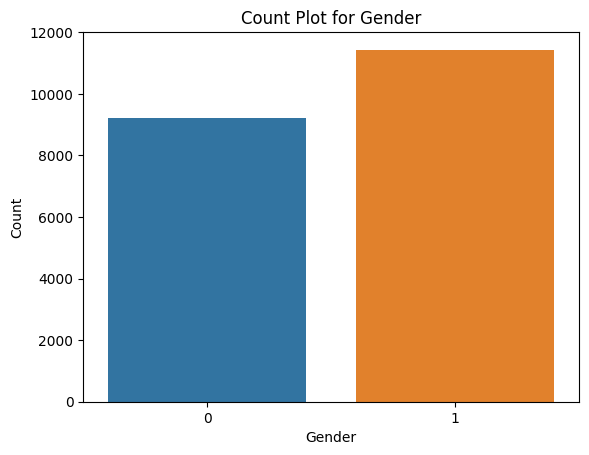

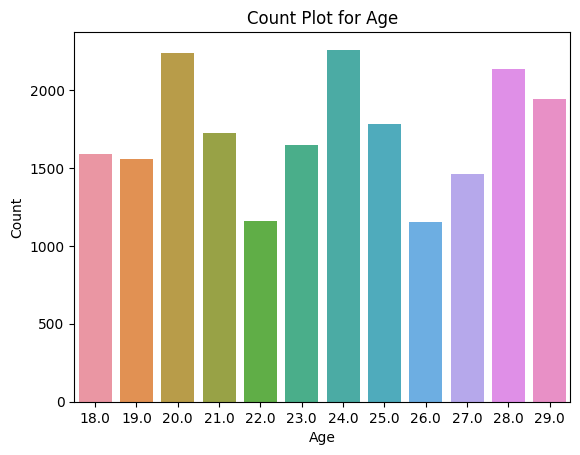

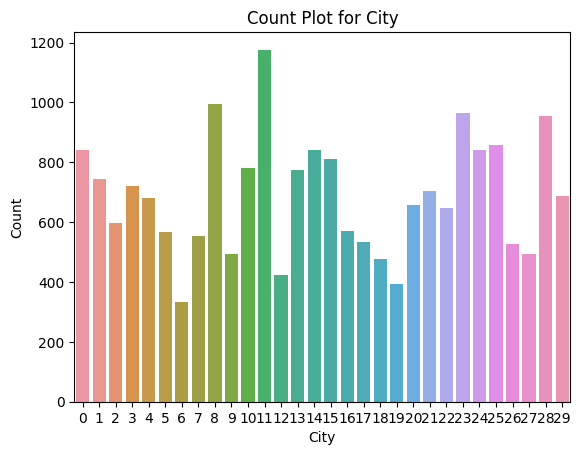

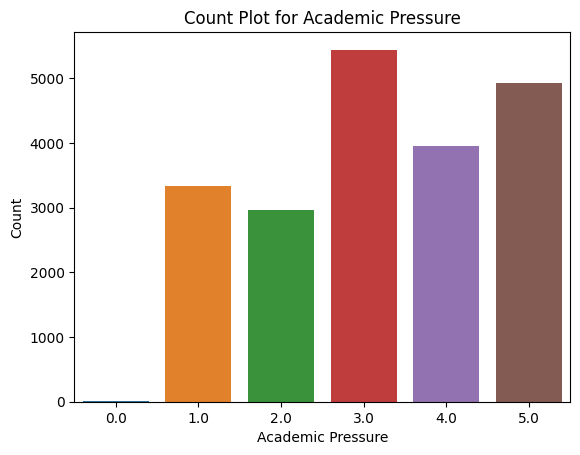

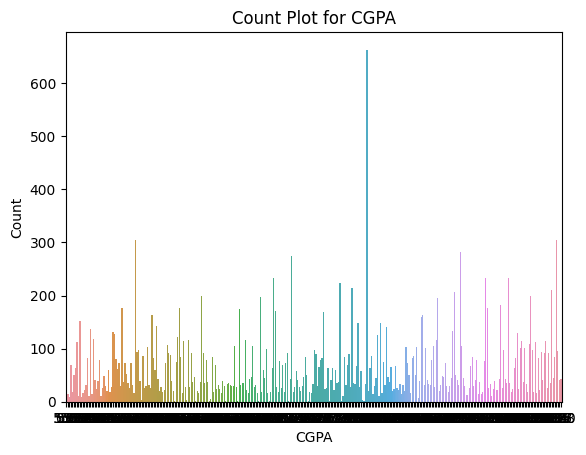

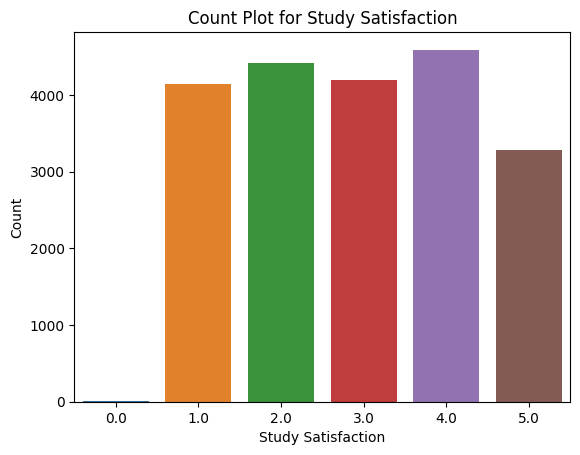

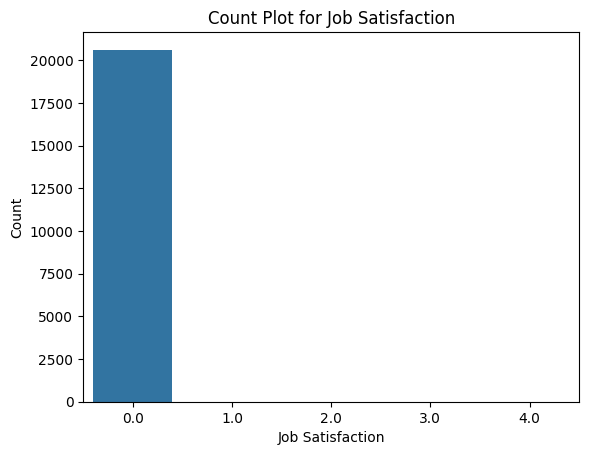

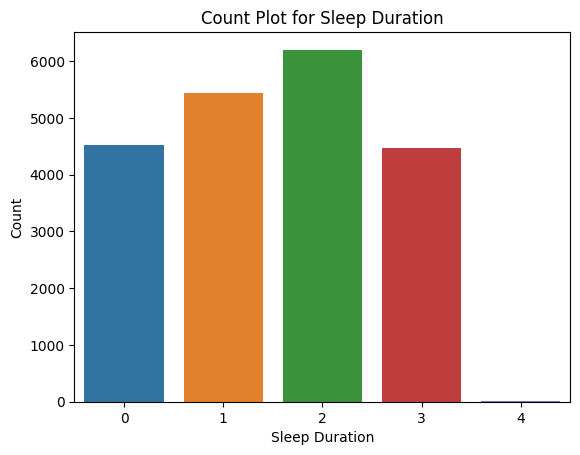

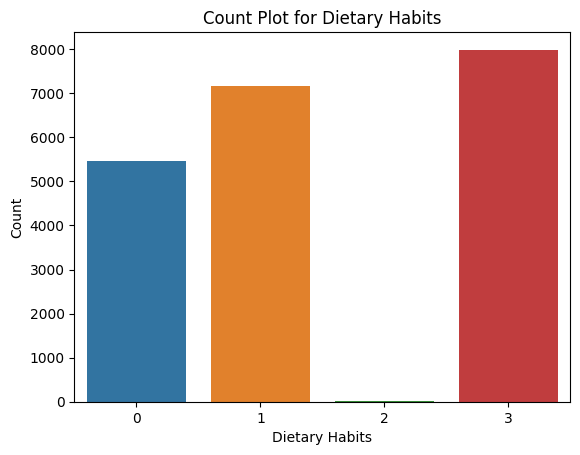

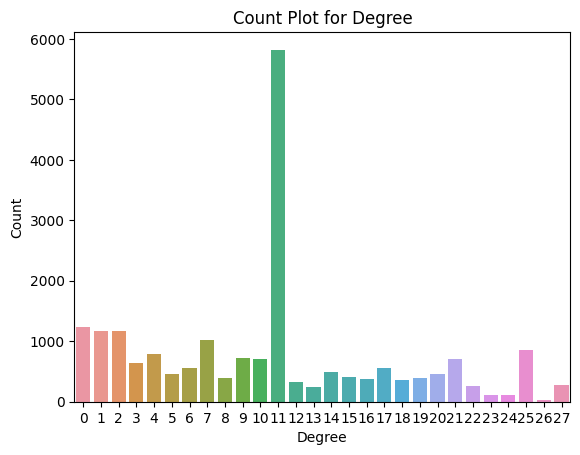

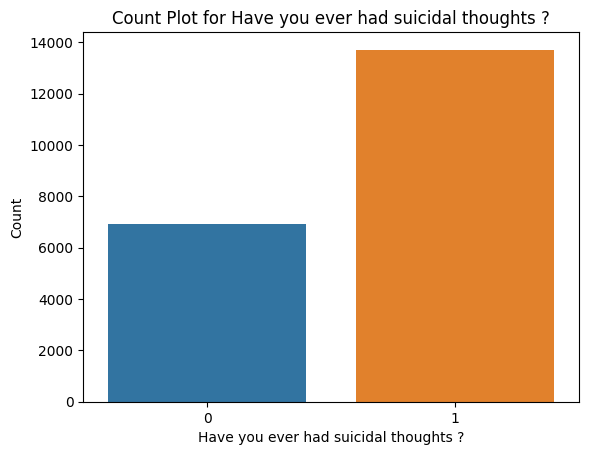

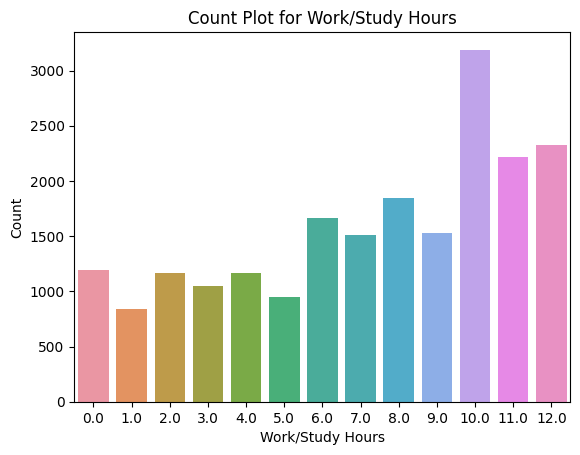

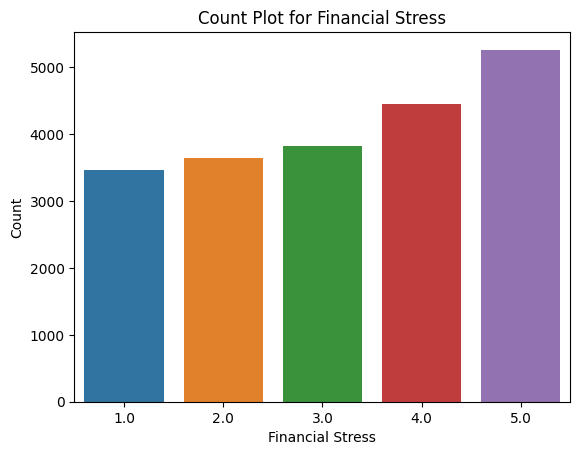

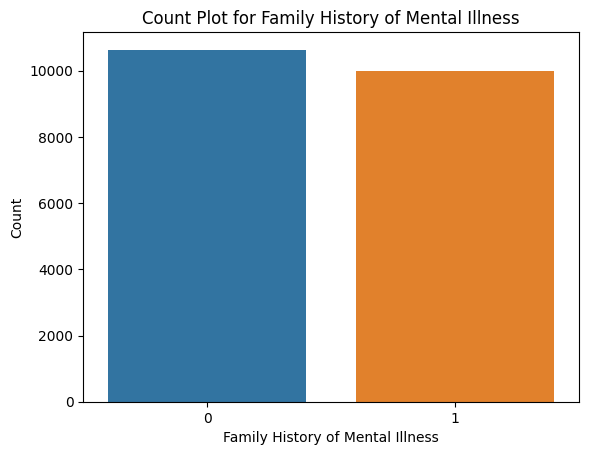

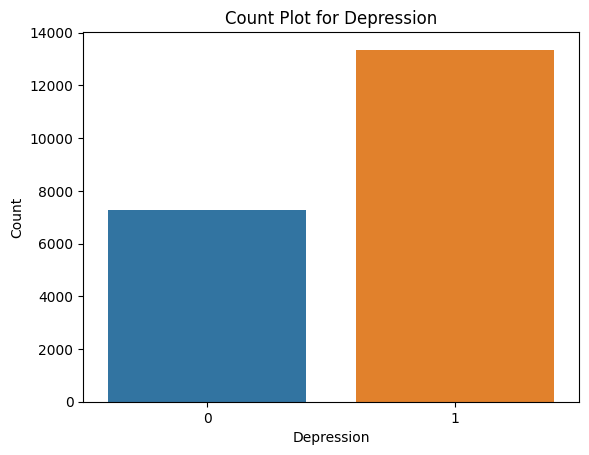

In [26]:
for column in data.columns:
    sea.countplot(x=data[column])
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Count Plot for {column}')
    plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [28]:
models = {
    "Logistic Regression":LogisticRegression(random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "Ada Boost":AdaBoostClassifier(random_state=42),
    "Multi Layer Perceptron":MLPClassifier(hidden_layer_sizes=(100,),random_state=42, max_iter=300),
    "XG Boost":XGBClassifier(random_state=42)
}

In [29]:
cv_score = {}
best_models = []
for modelname,model in models.items():
    print(f"Training {modelname} with default parameters...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_score[modelname] = scores
    print(f" Cross-Validation Accuracy: {np.mean(scores)}")
    if np.mean(scores) > 0.8:
        best_models.append(modelname)

Training Logistic Regression with default parameters...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 Cross-Validation Accuracy: 0.8495279315355312
Training Random Forest with default parameters...
 Cross-Validation Accuracy: 0.844318214971107
Training Ada Boost with default parameters...
 Cross-Validation Accuracy: 0.8495884825386504
Training Multi Layer Perceptron with default parameters...
 Cross-Validation Accuracy: 0.8454087568860711
Training XG Boost with default parameters...
 Cross-Validation Accuracy: 0.8345654116890225


In [30]:
from sklearn.metrics import confusion_matrix

for modelname,model in models.items():
    print(f'{modelname}')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Logistic Regression
Accuracy: 0.8372093023255814
Confusion Matrix:
[[1054  392]
 [ 280 2402]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1446
           1       0.86      0.90      0.88      2682

    accuracy                           0.84      4128
   macro avg       0.82      0.81      0.82      4128
weighted avg       0.84      0.84      0.84      4128

Random Forest
Accuracy: 0.8362403100775194
Confusion Matrix:
[[1059  387]
 [ 289 2393]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1446
           1       0.86      0.89      0.88      2682

    accuracy                           0.84      4128
   macro avg       0.82      0.81      0.82      4128
weighted avg       0.83      0.84      0.83      4128

Ada Boost
Accuracy: 0.842296511627907
Confusion Matrix:
[[1082  364]
 [ 287 2395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      14

In [31]:
best_models

['Logistic Regression',
 'Random Forest',
 'Ada Boost',
 'Multi Layer Perceptron',
 'XG Boost']

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

LR = LogisticRegression(random_state=42)
RF = RandomForestClassifier(n_estimators=100,random_state=42)
AB = AdaBoostClassifier(random_state=42)
MLP = MLPClassifier(hidden_layer_sizes=(100,),random_state=42, max_iter=300)
XG = XGBClassifier(random_state=42)

In [33]:
ensemble = VotingClassifier(
    estimators=[
        ('LR', LR),
        ('RF', RF),
        ('AB', AB),
        ('MLP', MLP),
        ('XG',XG)
    ],
    voting='hard'  # Use 'hard' for majority voting, 'soft' for averaging probabilities
)

ensemble.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.84375
